In [1]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # For data visualization
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier  # Import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder


In [2]:
# Step 2: Load the Titanic dataset
titanic = sns.load_dataset('titanic')

# Display the first few rows to understand the data
print(titanic.head())

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1000)>

## Dataset Description:
The Titanic dataset contains features such as:

*   Survived: Survival (0 = No, 1 = Yes)
*   Pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
*   Sex: Gender
*   Age: Age in years
*   Sibsp: Number of siblings/spouses aboard
*   Parch: Number of parents/children aboard
*   Fare: Passenger fare
*   Embarked: Port of Embarkation

# Objective:
Predict whether a passenger survived or not based on the available features.

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


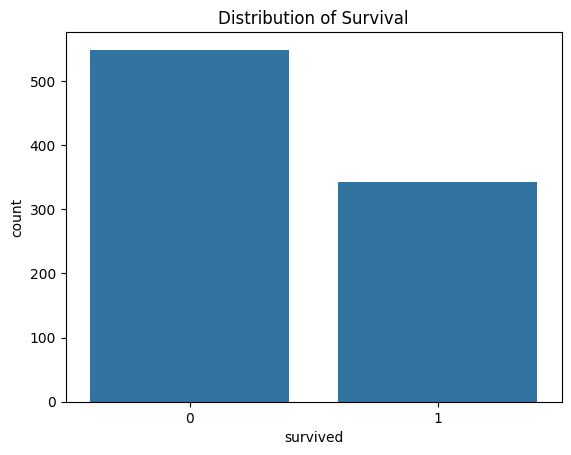

In [6]:
# Step 3: Data Exploration
# Check for missing values
print(titanic.isnull().sum())

# Visualize the distribution of 'Survived' feature
sns.countplot(x='survived', data=titanic)
plt.title('Distribution of Survival')
plt.show()

In [8]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Handling Missing Values:


In [9]:
# Step 4: Data Preprocessing
# Drop irrelevant features
titanic.drop(['deck', 'embark_town', 'alive', 'class', 'who', 'adult_male'], axis=1, inplace=True)

# Fill missing 'age' values with the median age
titanic['age'].fillna(titanic['age'].median(), inplace=True)

# Drop rows with missing 'embarked' values
titanic.dropna(subset=['embarked'], inplace=True)

# Verify that there are no more missing values
print(titanic.isnull().sum())

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
alone       0
dtype: int64


In [10]:
# Encode 'sex' and 'embarked' using Label Encoding
le = LabelEncoder()
titanic['sex'] = le.fit_transform(titanic['sex'])  # Male=1, Female=0
titanic['embarked'] = le.fit_transform(titanic['embarked'])  # S=2, C=0, Q=1

# Alternatively, use One-Hot Encoding for 'embarked'
# titanic = pd.get_dummies(titanic, columns=['embarked'], drop_first=True)

In [11]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,1,22.0,1,0,7.2500,2,False
1,1,1,0,38.0,1,0,71.2833,0,False
2,1,3,0,26.0,0,0,7.9250,2,True
3,1,1,0,35.0,1,0,53.1000,2,False
4,0,3,1,35.0,0,0,8.0500,2,True


In [12]:
# Define features and target variable
X = titanic.drop('survived', axis=1)
y = titanic['survived']

# Display the first few rows of features
print(X.head())

   pclass  sex   age  sibsp  parch     fare  embarked  alone
0       3    1  22.0      1      0   7.2500         2  False
1       1    0  38.0      1      0  71.2833         0  False
2       3    0  26.0      0      0   7.9250         2   True
3       1    0  35.0      1      0  53.1000         2  False
4       3    1  35.0      0      0   8.0500         2   True


In [13]:
# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
# Step 6: Create and train the Random Forest model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Explanation:
# - n_estimators=100 means 100 decision trees will be created in the forest.
# - random_state=42 ensures that the randomization is consistent each time the code is run.

RandomForestClassifier(random_state=42)

In [15]:
# Step 7: Make predictions on the test set
y_pred_rf = rf_clf.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", cm_rf)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 76.40%
Confusion Matrix:
 [[140  27]
 [ 36  64]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       167
           1       0.70      0.64      0.67       100

    accuracy                           0.76       267
   macro avg       0.75      0.74      0.74       267
weighted avg       0.76      0.76      0.76       267



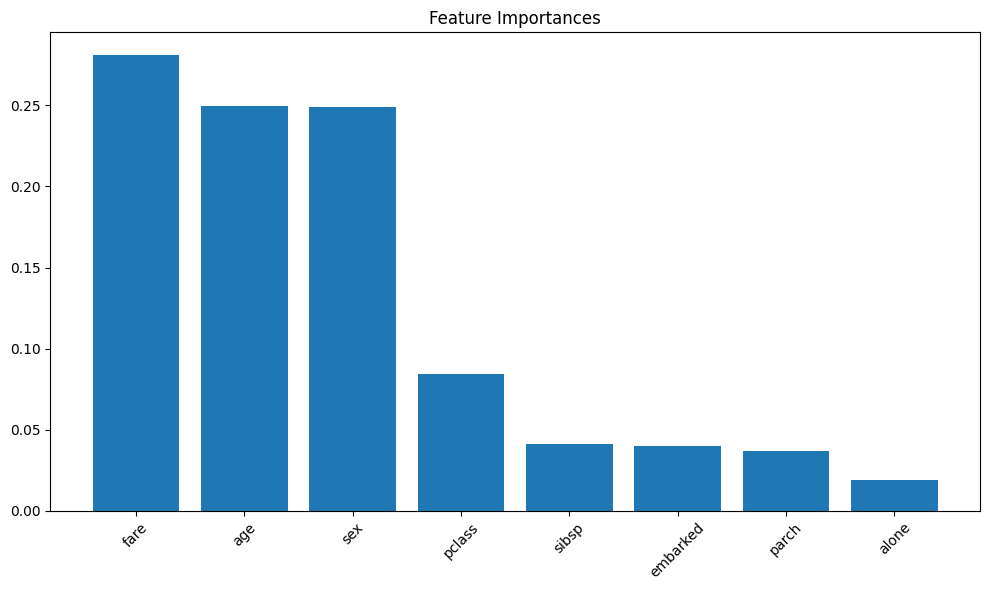

In [16]:
# Step 8: Feature Importance
importances = rf_clf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

# Plot the feature importances
plt.figure(figsize=(10,6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()